In [1]:
import numpy as np
import pandas as pd 

data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

data[['Blood_Pressure1', 'Blood_Pressure2']] = data['Blood Pressure'].str.split('/', expand=True).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Blood_Pressure1          374 non-null    int32  
 14  Blood_Pressure2          3

In [2]:
from sklearn.preprocessing import MinMaxScaler
ohe=pd.get_dummies(data[['Gender', 'Occupation', 'BMI Category']]).astype(int)
for i in range(5):
    data.loc[(data.Age >= 27+(i*8)) & (data.Age < 27+(i*8)+8), 'AgeGroup'] = i
data.drop(columns=['Gender', 'Occupation', 'BMI Category', 'Age'], inplace=True)
data=pd.concat([data, ohe], axis = 1)

MMS = MinMaxScaler()
data[['Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood_Pressure1', 'Blood_Pressure2']]=MMS.fit_transform(data[['Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood_Pressure1', 'Blood_Pressure2']])
data

,Person ID,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure1,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,0.111111,0.4,0.20,0.6,126/83,0.571429,0.171429,None,0.407407,...,0,0,0,0,1,0,0,0,0,1
1,2,0.148148,0.4,0.50,1.0,125/80,0.476190,1.000000,None,0.370370,...,0,0,0,0,0,0,1,0,0,0
2,3,0.148148,0.4,0.50,1.0,125/80,0.476190,1.000000,None,0.370370,...,0,0,0,0,0,0,1,0,0,0
3,4,0.037037,0.0,0.00,1.0,140/90,0.952381,0.000000,Sleep Apnea,0.925926,...,0,1,0,0,0,0,0,0,1,0
4,5,0.037037,0.0,0.00,1.0,140/90,0.952381,0.000000,Sleep Apnea,0.925926,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0.851852,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1
370,371,0.814815,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1
371,372,0.851852,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1
372,373,0.851852,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1


In [3]:
X=data.drop(columns=['Sleep Disorder','Blood Pressure'])
y=data['Sleep Disorder']

# PCA

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_transform1 = pca.fit_transform(X)

In [5]:
pca.explained_variance_ratio_

array([9.99813411e-01, 5.20127867e-05])

In [6]:
len(y)

374

In [7]:
pca_res = pd.DataFrame({'pca_1': X_transform1[:,0], 'pca_2': X_transform1[:,1],'label' : y})

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

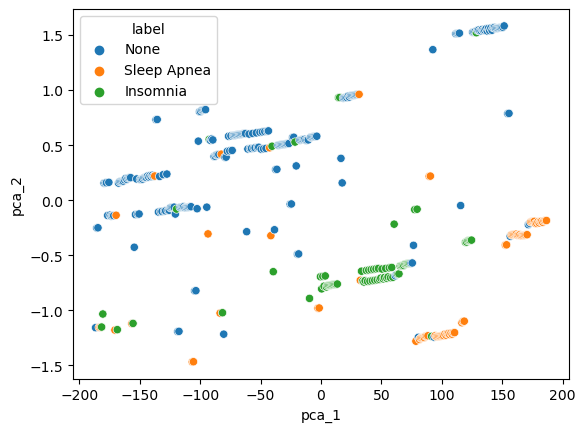

In [8]:
import seaborn as sns
sns.scatterplot(data=pca_res, x='pca_1', y='pca_2', hue='label')

C:\Users\koles\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\koles\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

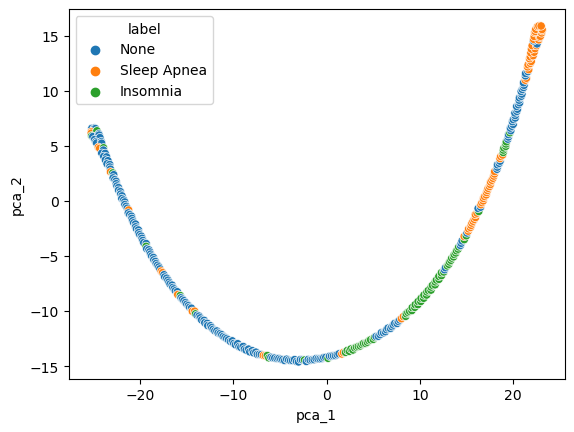

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_transform2 = tsne.fit_transform(X)
tsne_res = pd.DataFrame({'pca_1': X_transform2[:,0], 'pca_2': X_transform2[:,1],'label' : y})
sns.scatterplot(data=tsne_res, x='pca_1', y='pca_2', hue='label')

(-0.5, 959.5, 1279.5, -0.5)

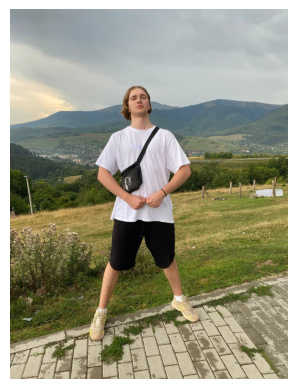

In [10]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

original_image = cv2.imread("lab21.jpg")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

(-0.5, 959.5, 1279.5, -0.5)

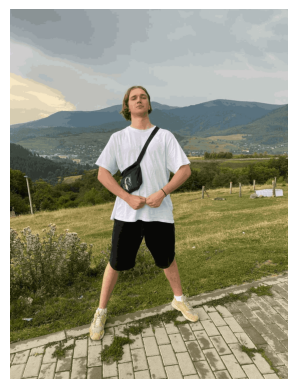

In [11]:
reshaped_image = np.reshape(
    original_image,
      ((original_image.shape[0] * original_image.shape[1]), 3))

model = KMeans(n_clusters=64)
target = model.fit_predict(reshaped_image)
color_space = model.cluster_centers_

output_image = np.reshape(color_space.astype(
    "uint8")[target], (original_image.shape[0], original_image.shape[1], 3))
con_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

(-0.5, 959.5, 1279.5, -0.5)

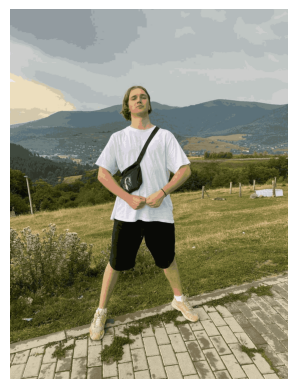

In [12]:
model = KMeans(n_clusters=32)
target = model.fit_predict(reshaped_image)
color_space = model.cluster_centers_

output_image = np.reshape(color_space.astype(
    "uint8")[target], (original_image.shape[0], original_image.shape[1], 3))
con_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

(-0.5, 959.5, 1279.5, -0.5)

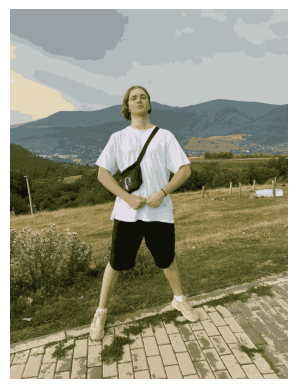

In [13]:
model = KMeans(n_clusters=16)
target = model.fit_predict(reshaped_image)
color_space = model.cluster_centers_

output_image = np.reshape(color_space.astype(
    "uint8")[target], (original_image.shape[0], original_image.shape[1], 3))
con_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

(-0.5, 959.5, 1279.5, -0.5)

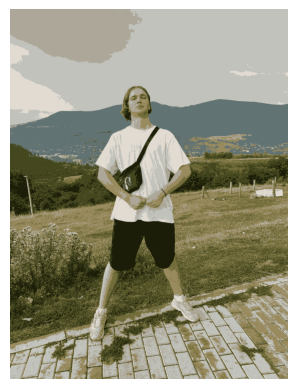

In [14]:
model = KMeans(n_clusters=8)
target = model.fit_predict(reshaped_image)
color_space = model.cluster_centers_

output_image = np.reshape(color_space.astype(
    "uint8")[target], (original_image.shape[0], original_image.shape[1], 3))
con_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

Corona=pd.read_csv('Corona_NLP_train.csv',encoding='latin1')

Corona.Sentiment.replace(to_replace='Extremely Positive', value='Positive',inplace=True)
Corona.Sentiment.replace(to_replace='Extremely Negative', value='Negative',inplace=True)
print(Corona.Sentiment.value_counts())
Corona = Corona[['OriginalTweet','Sentiment']]
Corona.head(10)

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [16]:
import re
import string
stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub("@\S+", " ", text)
    # remove url
    text = re.sub("https*\S+", " ", text)
    # remove hashtags
    text = re.sub("#\S+", " ", text)
    # remove all numbers
    text = re.sub("\d", " ", text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    # stopwords     
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [17]:
Corona.OriginalTweet=Corona.OriginalTweet.apply(clean_text)

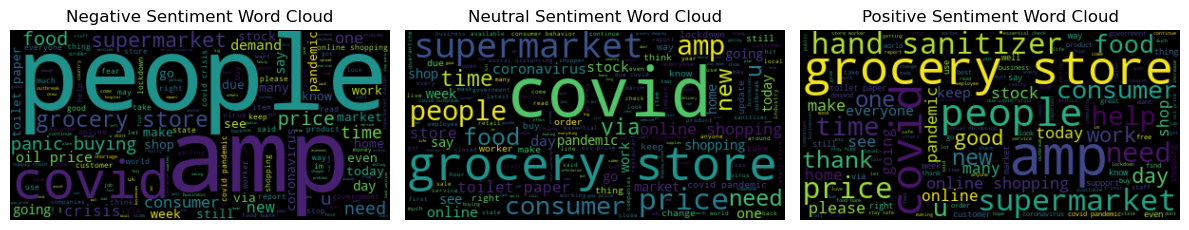

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_text = ' '.join(Corona[Corona.Sentiment == 'Negative'].OriginalTweet.tolist())
neutral_text = ' '.join(Corona[Corona.Sentiment == 'Neutral'].OriginalTweet.tolist())
positive_text = ' '.join(Corona[Corona.Sentiment == 'Positive'].OriginalTweet.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tfidf=TfidfVectorizer()
X_transformed=tfidf.fit_transform(Corona.OriginalTweet)
X_transformed

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Corona.Sentiment, test_size=0.2)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted) 
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))

C:\Users\koles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score 0.81511175898931
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82      3092
     Neutral       0.76      0.67      0.71      1563
    Positive       0.83      0.87      0.85      3577

    accuracy                           0.82      8232
   macro avg       0.80      0.79      0.79      8232
weighted avg       0.81      0.82      0.81      8232



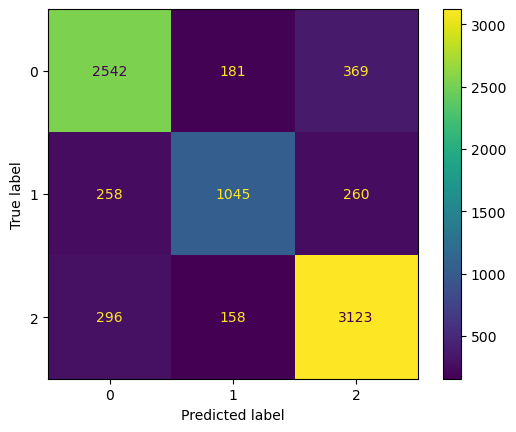

In [28]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(max_iter=100) 
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)

accuracy score 0.6479591836734694
              precision    recall  f1-score   support

    Negative       0.75      0.66      0.70      3092
     Neutral       0.81      0.02      0.05      1563
    Positive       0.60      0.91      0.72      3577

    accuracy                           0.65      8232
   macro avg       0.72      0.53      0.49      8232
weighted avg       0.69      0.65      0.59      8232



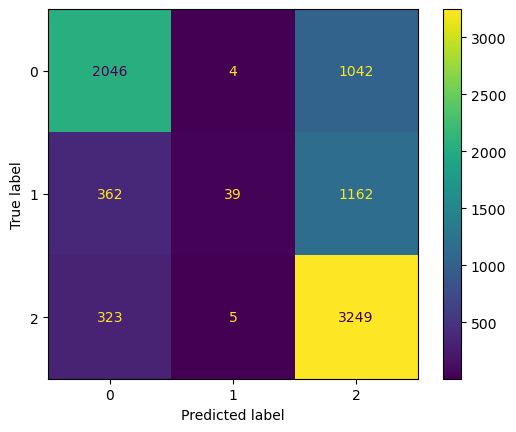

In [23]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

eval_model(y_test, nb_y_pred)